In [1]:
from src.data import load_data
from src.models import util_model
from src.data import util
from pathlib import Path

In [2]:
image_name = "trans020" 
front_image_name = image_name + "-1"
back_image_name = image_name + "-2"
front_image_path = "data/raw/front"
back_image_path = "data/raw/back"
front_image = load_data.read_image(front_image_path, front_image_name)
back_image = load_data.read_image(back_image_path, back_image_name)

In [3]:
front_section_dict = util_model.detect_section(front_image, util_model.front_model)
pf_sections = util.pre_process(front_section_dict)
front_text_dict = util_model.images_to_texts(pf_sections)
courses_df = util.make_course(front_text_dict)
error_df = util.get_error(courses_df)
error_df


0: 640x480 3 sections, 861.1ms
Speed: 2.7ms preprocess, 861.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 480)


,ocr,numeric,section,id,name,unit,grade


In [4]:
post_courses_df = util.post_process(courses_df, pf_sections)
post_error_df = util.get_error(post_courses_df).reset_index(drop=True)
post_error_df

,ocr,numeric,section,id,name,unit,grade


In [5]:
# util_model.get_ocr_text(pf_sections[2]).split('\n')

In [6]:
back_section_dict = util_model.detect_section(back_image, util_model.back_model)
pb_sections = util.pre_process(back_section_dict)
back_text_dict = util_model.images_to_texts(pb_sections)
gpa = util.get_GPA(back_text_dict[0])
gpa


0: 640x480 1 section, 872.0ms
Speed: 3.3ms preprocess, 872.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)


,ocr,category,unit,grade
0,ภาษาไทย 5.0 3.60,ภาษาไทย,5.000,3.60
1,คณิตศาสตร์ 16.5 3.87,คณิตศาสตร์,16.500,3.87
2,วิทยาศาสตร์และเทคโนโลยี 30.0 3.49,วิทยาศาสตร์,30.000,3.49
3,สังคมศึกษา ศาสนา และวัฒนธรรม 6.5 3.65,สังคมศึกษา,6.500,3.65
4,สุขศึกษาและพลศึกษา 2.5 4.00,สุขศึกษา,2.500,4.00
5,ศิลปะ 3.5 4.00,ศิลปะ,3.500,4.00
6,การงานอาชีพ 2.0 3.75,การงานอาชีพ,2.000,3.75
7,.ภาษาต่างประเทศ 10.0...,ภาษาต่างประเทศ,10.000,3.55
8,การศึกษาค้นคว้าด้วยตนเอง (!5) 1.5 4.00,ศึกษาค้นคว้าด้วยตนเอง,1.500,4.00
9,ผลการเรียนเฉลี่ยตลอดหลักสูตร 77.5 3.65,ผลการเรียน,0.775,3.65


In [7]:
front_edf = post_courses_df[["section", "id", "name", "unit", "grade"]]
back_edf = gpa[["category", "unit", "grade"]]

In [12]:
front_edf

,section,id,name,unit,grade
0,000,ท33101,ภาษาไทย,1.0,3.5
1,001,ส33101,สังคมศึกษา,1.0,3.0
2,002,ส33102,ประวัติศาสตร์ไทย,0.5,2.5
3,003,พ33103,สุขศึกษาและพลศึกษา,0.5,4.0
4,004,ศ33101,ศิลปะ,0.5,4.0
...,...,...,...,...,...
72,225,ว30261,การออกแบบและเทคโนโลยี,1.0,4.0
73,226,ว32202,ฟิสิกส์,1.5,2.5
74,227,ว32222,เคมี,1.0,4.0
75,228,ว32242,ชีววิทยา,1.5,3.0


In [13]:
back_edf

,category,unit,grade
0,ภาษาไทย,5.000,3.60
1,คณิตศาสตร์,16.500,3.87
2,วิทยาศาสตร์,30.000,3.49
3,สังคมศึกษา,6.500,3.65
4,สุขศึกษา,2.500,4.00
5,ศิลปะ,3.500,4.00
6,การงานอาชีพ,2.000,3.75
7,ภาษาต่างประเทศ,10.000,3.55
8,ศึกษาค้นคว้าด้วยตนเอง,1.500,4.00
9,ผลการเรียน,0.775,3.65


In [9]:
load_data.export_df_to_csv("data/out/csv/front", front_image_name, front_edf)
load_data.csv_to_json("data/out/json/front", "data/out/csv/front", front_image_name)
load_data.export_df_to_csv("data/out/csv/back", back_image_name, back_edf)
load_data.csv_to_json("data/out/json/back", "data/out/csv/back", back_image_name)

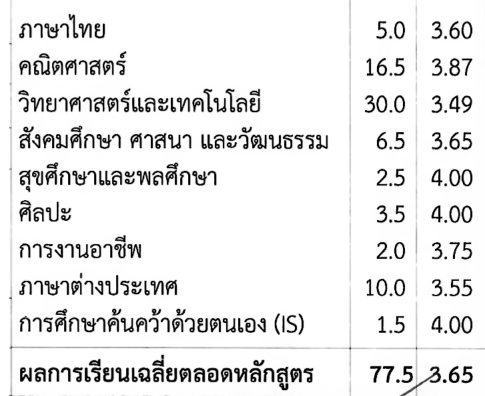

In [10]:
pb_sections[0]

In [11]:
def add_alphabet_to_image(image, bounding_box, alphabet, font:str):
    # Open the original image
    draw = ImageDraw.Draw(image)

    # Calculate the width for the whitespace (assuming it is 1% of the image width)
    white_space_width = int(image.width * 0.01)

    # Load a font
    font_path = Path('data/font')/font/f"{font}.ttf"
    
    df = pd.DataFrame(bounding_box)
    font_size = df.height.median()*3
    # Extract the bounding box coordinates
    for i in range(len(bounding_box)):
        left, top, width, height, textt = bounding_box[i].values()

        # Set the font size to fit the bounding box
        font = ImageFont.truetype(font_path, font_size)
        
        # Calculate position for the alphabet
        text_x = white_space_width // 2
        text_y = top-height*(3/2)


        # Draw the alphabet on the image
        draw.text((text_x, text_y), alphabet, font=font, fill="black")
    return image
